Enter the CSV file path:  Airbnb_EDA.csv


Data loaded successfully!

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43566 non-null  int64  
 1   listing_url                                   43566 non-null  object 
 2   scrape_id                                     43566 non-null  int64  
 3   last_scraped                                  43566 non-null  object 
 4   source                                        43566 non-null  object 
 5   name                                          43566 non-null  object 
 6   description                                   42866 non-null  object 
 7   neighborhood_overview                         25201 non-null  object 
 8   picture_url                                   43566 non-null  object 
 9   host_id     

C:\Users\hp\AppData\Local\Temp\ipykernel_7360\977066875.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7360\977066875.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe


Data pre-processing completed!

Generating visualizations...


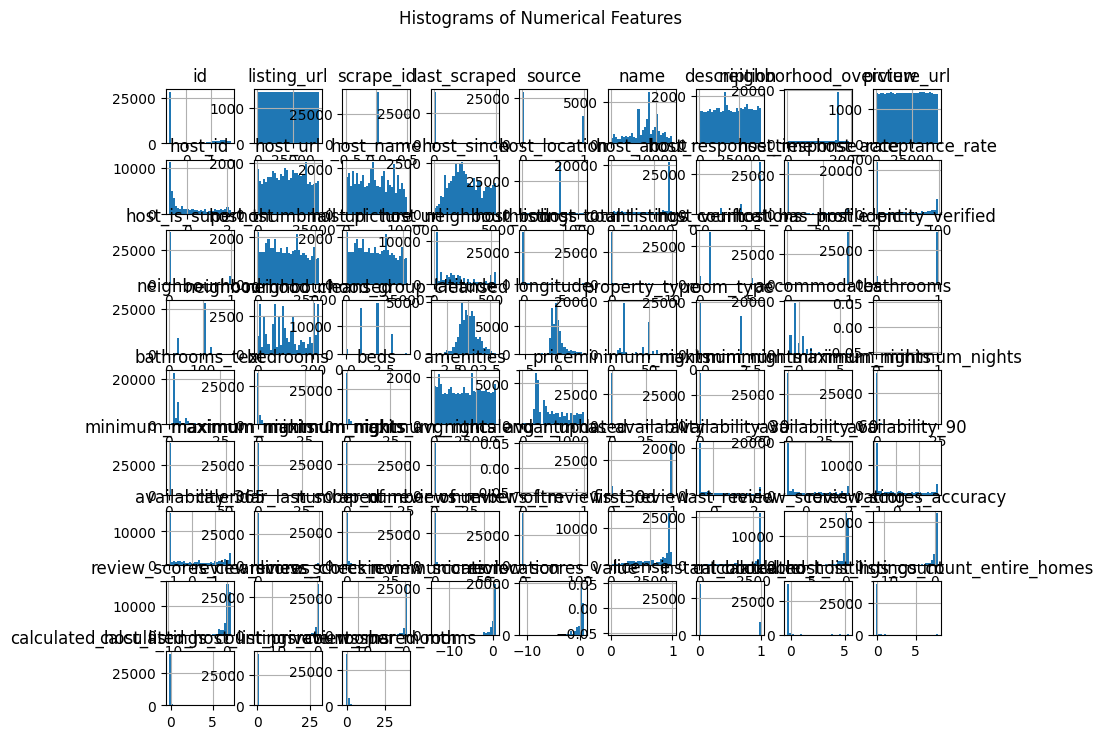

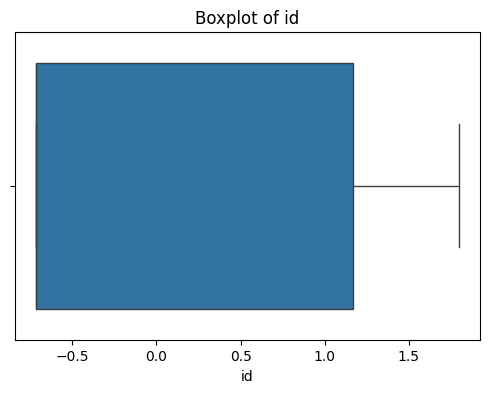

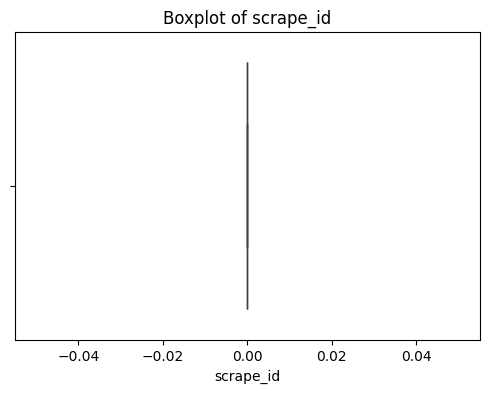

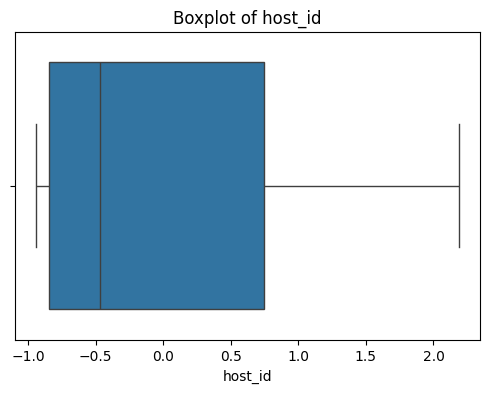

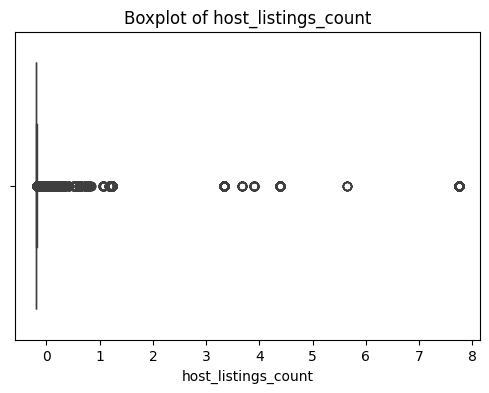

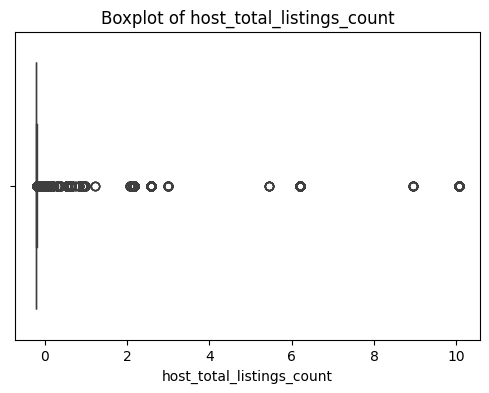

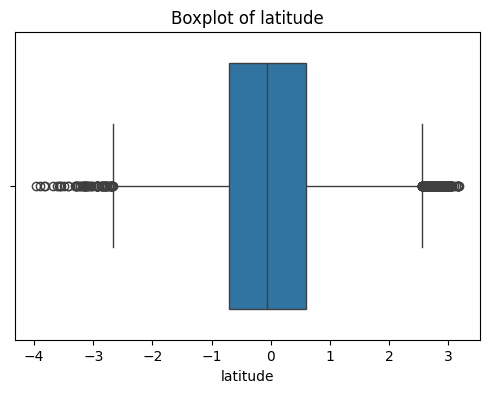

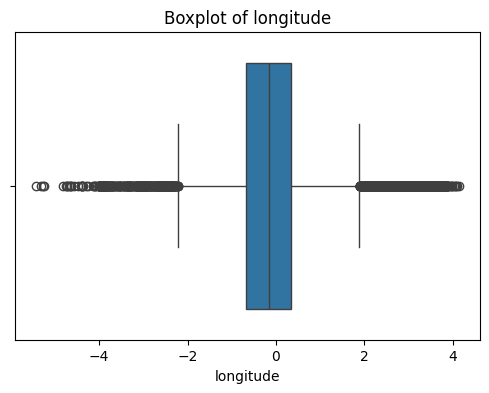

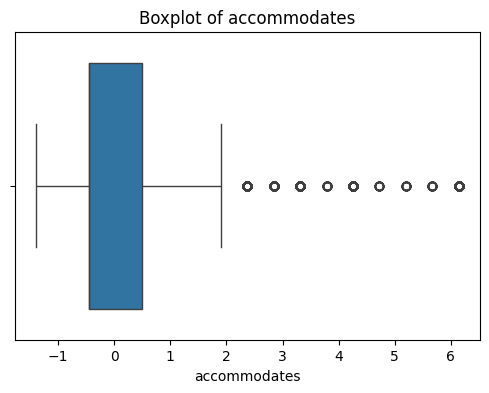

ValueError: List of boxplot statistics and `positions` values must have same the length

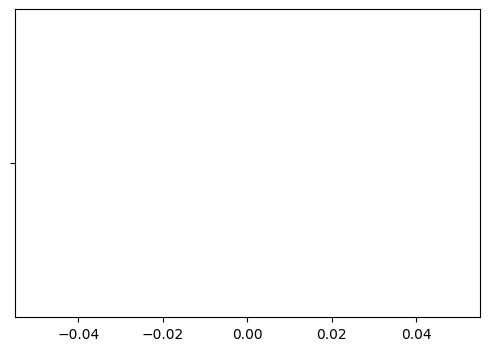

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_data():
    """Prompt user for CSV file path and load data."""
    file_path = input("Enter the CSV file path: ")
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return df
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def display_summary(df):
    """Display basic information and statistical summary."""
    print("\n--- Data Overview ---")
    print(df.info())
    print("\n--- Statistical Summary (Numerical Columns) ---")
    print(df.describe())
    print("\n--- Missing Values ---")
    print(df.isnull().sum())
    print("\n--- Categorical Columns Value Counts ---")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())

def preprocess_data(df):
    """Handle missing values, encode categorical data, and scale numerical features."""
    df = df.copy()
    
    # Handle missing values
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    
    # Encode categorical data
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    # Scale numerical data
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    print("\nData pre-processing completed!")
    return df

def visualize_data(df):
    """Generate automated visualizations based on column types."""
    print("\nGenerating visualizations...")
    
    # Histograms for numerical features
    df.hist(figsize=(10, 8), bins=30)
    plt.suptitle("Histograms of Numerical Features")
    plt.show()
    
    # Box plots for numerical features
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
    
    # Bar charts for categorical features
    for col in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[col])
        plt.xticks(rotation=45)
        plt.title(f"Count Plot of {col}")
        plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Heatmap")
    plt.show()

def main():
    df = load_data()
    if df is not None:
        display_summary(df)
        df = preprocess_data(df)
        visualize_data(df)

if __name__ == "__main__":
    main()
